Given a dataset, which is a realization of GRF with zero mean with additive noise
$$\vec{d} = \vec{s} + \vec{e}, $$
the Weiner reconstructed field sampled at mapped points is given by
$$\vec{s} = \mathbf{S_{MD}}[\mathbf{S_{DD}} + \mathbf{N}]^{-1} \vec{d}, $$
where $\mathbf{S}$ is the signal covariance matrix and $\mathbf{N}$ is the noise covariance matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import george 

from george.kernels import ExpSquaredKernel

%matplotlib notebook
%run '../plot_setup.py'

In [70]:
# First we will generate a realization of a Gaussian Random Field (GRF) with a given covriance
# matrix. Here we will use a simple RBF kernel.
amp = 2.
metric = 4.

kernel = amp * ExpSquaredKernel(metric=metric)

GPObj = george.GP(kernel=kernel)

In [74]:
# Lets sample this at some locations
dx = 0.1
x_full = np.arange(-30, 30, dx)

# delta-field realization
delta = GPObj.sample(t=x_full, size=1)

# Adding gaussian noise to the realization
scale = 0.4
data_full = delta + np.random.normal(scale=scale, size=len(delta))

# These will be the points over which we want to interpolate the results
dxmap = 0.2
x_map = np.arange(-40, 40, dxmap)

In [75]:
# Choose a subset of points from the above - this will be our data
x = x_full[::15]
data = data_full[::15]

In [76]:
## THE RECONSTRUCTION STARTS NOW
## WHAT WE HAVE IS THE DATA AND SOME IDEA OF THE COVARIANCE MATRIX OF THE SIGNAL

# Creating the noise covariance matrix
N = scale ** 2 * np.eye(N=len(data))

In [77]:
# Getting the signal covariance matrix
Sxx = GPObj.get_matrix(x1=x)

# Getting the signal-map covariance matrix
Sxxmap = GPObj.get_matrix(x1=x_map, x2=x)

# Getting the map-map covariance  matrix
Smapmap = GPObj.get_matrix(x1=x_map, x2=x_map)

In [78]:
# Carrying the Weiner reconstruction
conv_kernel = np.dot(Sxxmap, np.linalg.inv(Sxx + N))
s = np.dot(conv_kernel, data)

In [79]:
# Covariance of the reconstructed values
C = Smapmap - np.dot(Sxxmap, np.dot(np.linalg.inv(Sxx + N), Sxxmap.T))
err = np.sqrt(np.diag(C))

<IPython.core.display.Javascript object>


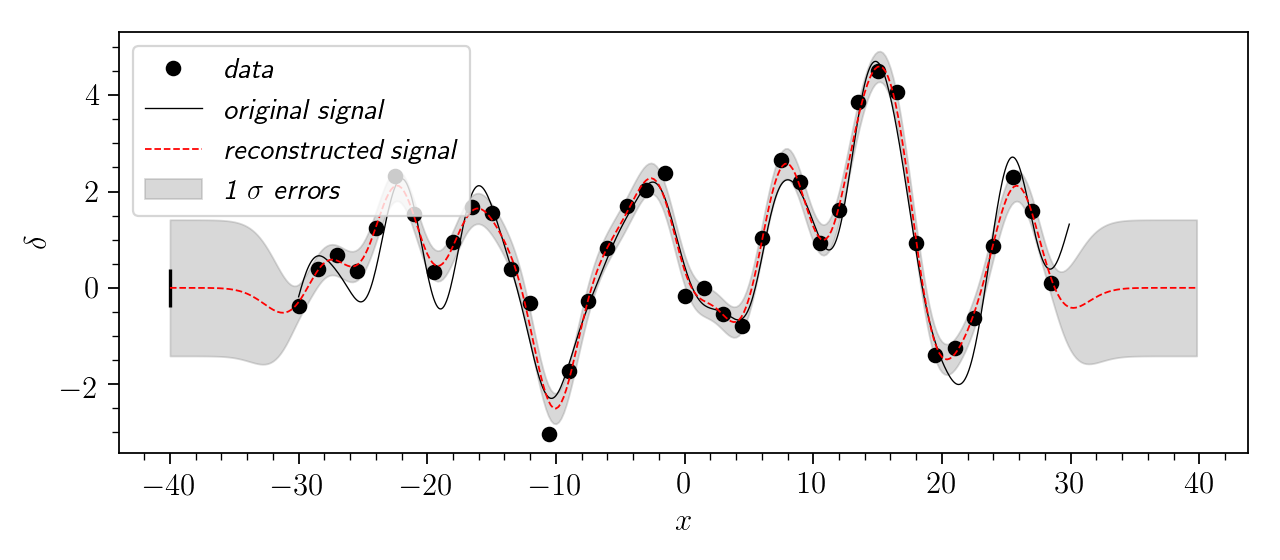

In [85]:
fig, ax = plt.subplots(1, figsize=(8, 3.5))
ax.plot(x, data, 'o', c='k', label=r'\textit{data}')
ax.plot(x_full, delta, '-k', lw=0.6, label=r'\textit{original signal}')
ax.plot(x_map, s, '--r', lw=0.8, label=r'\textit{reconstructed signal}')


ax.fill_between(x_map, s + err, s - err, color='gray', alpha=0.3, lw=0.8, label=r'\textit{1 $\sigma$ errors}')

ax.vlines(x=-40, ymin=-scale, ymax=scale)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\delta$')

plt.legend()
plt.tight_layout()
plt.show()

If $d = h * (x + e), $ then
 $$G_f = \frac{1}{H_f} \left(\frac{S_f}{S_f + N_f}\right)$$
 
If $d = h * x + e, $ then
 $$G_f = \frac{1}{H_f} \left(\frac{|H_f|^2 S_f}{|H_f|^2S_f + N_f}\right)$$

Covariance of the reconstrcution:
$$C = S_{MM} - S_{DM} (S_{DD} + N)^{-1} S_{DM}^T$$